# (FIFA19)
## by (Ahmed Salau)

## Preliminary Wrangling

> Context
- Football analytics

> Content
- Detailed attributes for every player registered in the latest edition of FIFA 19 database.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
# load the data
soccer = pd.read_excel('data.xlsx')

# Assessing the data

In [3]:
soccer.shape

(18207, 88)

In [4]:
soccer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 0 to 18206
Data columns (total 88 columns):
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null float64
Work Rate                   18159 non-null 

## Data Cleaning

- Having viewed the features available in the dataset. First thing i will do is to remove columns not needed for my analysis

In [5]:
# Remove columns not needed
soccer.drop(['Photo', 'Flag', 'Club Logo', 'Special', 'Real Face', 'Loaned From'], axis=1, inplace = True)

In [6]:
# drop more columns
soccer.drop(soccer.columns[21:47],axis=1, inplace = True)

In [7]:
soccer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 0 to 18206
Data columns (total 56 columns):
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Nationality                 18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null float64
Work Rate                   18159 non-null object
Body Type                   18207 non-null object
Position                    18147 non-null object
Jersey Number               18147 non-null float64
Joined                      16654 non-nul

In [8]:
# check for duplicated values
soccer.duplicated().sum()

0

In [9]:
# check for null values
soccer.isnull().sum()

ID                             0
Name                           0
Age                            0
Nationality                    0
Overall                        0
Potential                      0
Club                         241
Value                          0
Wage                           0
Preferred Foot                48
International Reputation      48
Weak Foot                     48
Skill Moves                   48
Work Rate                     48
Body Type                      0
Position                      60
Jersey Number                 60
Joined                      1553
Contract Valid Until         289
Height                        48
Weight                        48
Crossing                      48
Finishing                     48
HeadingAccuracy               48
ShortPassing                  48
Volleys                       48
Dribbling                     48
Curve                         48
FKAccuracy                    48
LongPassing                   48
BallContro

In [10]:
# drop rows with null values
soccer.dropna(axis = 0, inplace=True)

In [11]:
soccer.shape

(16643, 56)

### Lets correct datatypes

In [12]:
# view datatypes
soccer.dtypes

ID                                   int64
Name                                object
Age                                  int64
Nationality                         object
Overall                              int64
Potential                            int64
Club                                object
Value                               object
Wage                                object
Preferred Foot                      object
International Reputation           float64
Weak Foot                          float64
Skill Moves                        float64
Work Rate                           object
Body Type                           object
Position                            object
Jersey Number                      float64
Joined                      datetime64[ns]
Contract Valid Until                object
Height                              object
Weight                              object
Crossing                           float64
Finishing                          float64
HeadingAccu

In [13]:
# Firstly lets remove character signs from Value, Wage, Release Clause
soccer['Value'] = soccer['Value'].str.replace('€', '')
soccer['Wage'] = soccer['Wage'].str.replace('€', '')
soccer['Release Clause'] = soccer['Release Clause'].str.replace('€', '')

In [14]:
soccer.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110.5M,565K,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77M,405K,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118.5M,290K,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,72M,260K,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102M,355K,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196.4M


#### Looking at the top 5 rows:

- I noticed Value, Wage and Release clause columns all have their values represented with either 'K' or 'M'

e.g 4K which stands for 4000 and 4M which stands for 4000000 

This is not right, lets fix it by removing K and replace with '000' and remove M and replace with '000000'

In [15]:
# remove K, replace with '000'
soccer['Value'] = soccer.loc[:, 'Value'].map(lambda x: x.replace('K','000'))
soccer['Wage'] = soccer.loc[:, 'Wage'].map(lambda x: x.replace('K','000'))
soccer['Release Clause'] = soccer.loc[:, 'Release Clause'].map(lambda x: x.replace('K','000'))

# remove M, replace with '000000'
soccer['Value'] = soccer.loc[:, 'Value'].map(lambda x: x.replace('M','000000'))
soccer['Wage'] = soccer.loc[:, 'Wage'].map(lambda x: x.replace('M','000000'))
soccer['Release Clause'] = soccer.loc[:, 'Release Clause'].map(lambda x: x.replace('M','000000'))

In [16]:
# remove '.' replace with ''
soccer['Value'] = soccer['Value'].str.replace('.', '')
soccer['Release Clause'] = soccer['Release Clause'].str.replace('.', '')

In [17]:
# remove '000000' replace with '00000'
soccer['Value'] = soccer.loc[:, 'Value'].map(lambda x: x.replace('000000','00000'))
soccer['Release Clause'] = soccer.loc[:, 'Release Clause'].map(lambda x: x.replace('000000','00000'))

In [18]:
# remove K, replace with '000'
soccer['Height'] = soccer.loc[:, 'Height'].map(lambda x: x.replace("'",'.'))
soccer['Weight'] = soccer.loc[:, 'Weight'].map(lambda x: x.replace('lbs',''))

In [19]:
soccer.head(10)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000,565000,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,7700000,405000,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000,290000,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000
3,193080,De Gea,27,Spain,91,93,Manchester United,7200000,260000,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,10200000,355000,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,9300000,340000,Right,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172100000
6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,6700000,420000,Right,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137400000
7,176580,L. Suárez,31,Uruguay,91,91,FC Barcelona,8000000,455000,Right,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,16400000
8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,5100000,380000,Right,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104600000
9,200389,J. Oblak,25,Slovenia,90,93,Atlético Madrid,6800000,94000,Right,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,144500000


In [20]:
# correct column name
soccer.rename(columns={'Release Clause':'Release_clause', 'Preferred Foot':'Preferred_foot', 
                   'International Reputation':'International_reputation', 'Weak Foot':'Weak_foot', 
                   'Skill Moves':'Skill_moves', 'Work Rate':'Work_rate', 'Body Type':'Body_type', 'Jersey Number':'Jersey_number',
                   'Contract Valid Until':'Contract_valid_until', 'Release Clause':'Release_clause'}, inplace = True)

In [21]:
#change datatypes
soccer['Value'] = soccer['Value'].astype(int)
soccer['Wage'] = soccer['Wage'].astype(int)
soccer['Release_clause'] = soccer['Release_clause'].astype(int)
soccer['Height'] = soccer['Height'].astype(float)
soccer['Weight'] = soccer['Weight'].astype(int)
soccer['Jersey_number'] = soccer['Jersey_number'].astype(int)
soccer['Contract_valid_until'] = pd.to_datetime(soccer['Contract_valid_until'])
soccer.iloc[:, 10:13] = soccer.iloc[:, 10:13].astype(int)
soccer.iloc[:, 21:55] = soccer.iloc[:, 21:55].astype(int)

# convert source to category datatype
soccer.Body_type = soccer.Body_type.astype("category")
soccer.Position = soccer.Position.astype("category")
soccer.Work_rate = soccer.Work_rate.astype("category")

In [22]:
soccer.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred_foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release_clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000,565000,Left,...,96,33,28,26,6,11,15,14,8,226500000
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,7700000,405000,Right,...,95,28,31,23,7,11,15,14,11,127100000
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000,290000,Right,...,94,27,24,33,9,9,15,15,11,228100000
3,193080,De Gea,27,Spain,91,93,Manchester United,7200000,260000,Right,...,68,15,21,13,90,85,87,88,94,138600000
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,10200000,355000,Right,...,88,68,58,51,15,13,5,10,13,196400000


### What is the structure of your dataset?

> I started the cleaning with 18207 observations, 88 features. After i removed columns not needed for my analysis and also removes null values. There are 16,643 observations in the dataset with 56 features to work with. Most variables are numeric in nature, but the variables Nationality, position are categorical which will prove worthy for this project. Features like age, height, weight will have it's role to play also.


### What is/are the main feature(s) of interest in your dataset?

> I'm mostly interested in finding out attributes that each playing positions must have. Factors that influence whether a player makes it as a top footballer.

- Age                           
- Nationality                   
- Overall                        
- Potential                      
- Club                         
- Value                        
- Wage                         
- Preferred Foot               
- International Reputation      
- Work Rate                   
- Body Type                      
- Position                     

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> - I expect player Age, Position would have a huge effect on a player's value which will then determine how much the player earns. 
- Also i'll like to know if the Height and Weight determines the position a player can play. 

In [23]:
# descriptive statistics for numeric variables
print(soccer.describe())

                  ID           Age       Overall     Potential         Value  \
count   16643.000000  16643.000000  16643.000000  16643.000000  1.664300e+04   
mean   213845.010094     25.226221     66.162771     71.140900  1.611506e+06   
std     30546.285826      4.716588      7.008236      6.151409  3.991862e+06   
min        16.000000     16.000000     46.000000     48.000000  1.000000e+04   
25%    199569.500000     21.000000     62.000000     67.000000  2.800000e+05   
50%    221493.000000     25.000000     66.000000     71.000000  6.000000e+05   
75%    236802.000000     29.000000     71.000000     75.000000  1.300000e+06   
max    246620.000000     45.000000     94.000000     95.000000  1.185000e+08   

                Wage  International_reputation     Weak_foot   Skill_moves  \
count   16643.000000              16643.000000  16643.000000  16643.000000   
mean     9618.037613                  1.114823      2.942919      2.349516   
std     22263.518927                  0.39855

#### Observations

- 75% of the players in the dataset are below 29 years old. The oldest player is 45yrs and the youngest is 16yrs.
- The highest player value is €118,500,000 and the lowest player value is €10,000 .
- The mean wage is €9618 and the player with the highest earns €565000 weekly.

## Univariate Exploration

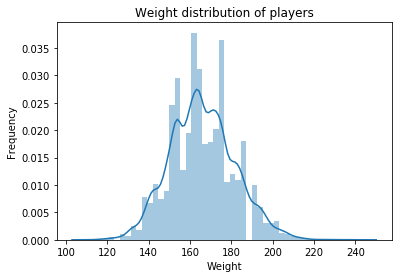

In [24]:
#histogram
sb.distplot(soccer['Weight'])
# Add labels
plt.title('Weight distribution of players')
plt.xlabel('Weight')
plt.ylabel('Frequency');

Our weight distribution looks normal.

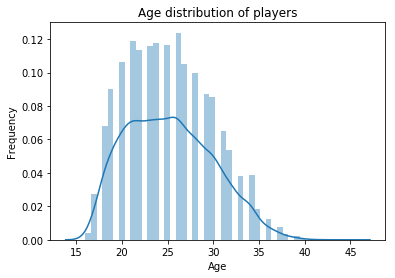

In [25]:
sb.distplot(soccer['Age']) 

# Add labels
plt.title('Age distribution of players')
plt.xlabel('Age')
plt.ylabel('Frequency');

This distribution shows most of the players in our data are in their 20s. And it's slightly positive skewed.

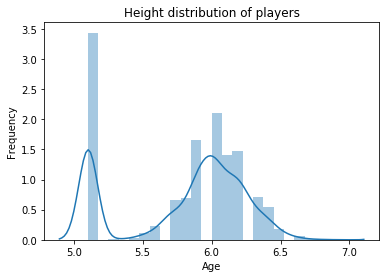

In [26]:
sb.distplot(soccer['Height']) 

# Add labels
plt.title('Height distribution of players')
plt.xlabel('Age')
plt.ylabel('Frequency');

### Now we move on to explore our categorical variables

#### Let's have a look at the top10 players Nationalities and see what we'll find

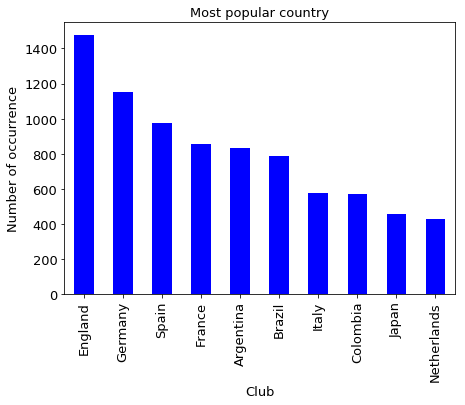

In [27]:
nation = soccer.Nationality.value_counts()[0:10]

#plot
g_bar = nation.plot.bar(color = 'blue', fontsize = 13)

#figure size(width, height)
g_bar.figure.set_size_inches(7, 5);

#Add labels
plt.title('Most popular country', color = 'black', fontsize = '13')
plt.xlabel('Club', color = 'black', fontsize = '13')
plt.ylabel('Number of occurrence', color = 'black', fontsize = '13');

- This is interesting England is the top footballing nation in the data. 
- And only Japan represent Asia.

#### Let's have a look at the top10 football clubs and see what we'll find

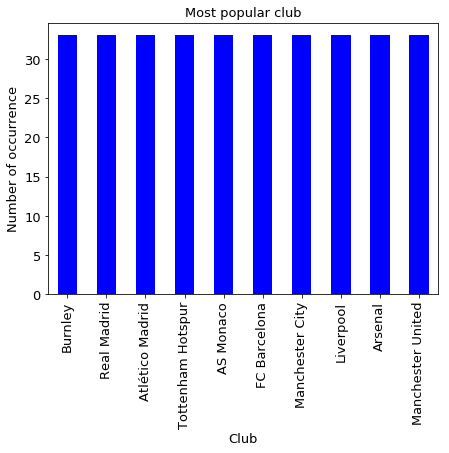

In [28]:
club = soccer.Club.value_counts()[0:10]

#plot
g_bar = club.plot.bar(color = 'blue', fontsize = 13)

#figure size(width, height)
g_bar.figure.set_size_inches(7, 5);

#Add labelbs
plt.title('Most popular club', color = 'black', fontsize = '13')
plt.xlabel('Club', color = 'black', fontsize = '13')
plt.ylabel('Number of occurrence', color = 'black', fontsize = '13');

- This came not as a surprise because i would expect that if England is the most popular country, then football clubs from England should crowd the data. That's why 6 clubs from England make up the Top10.
- Spanish clubs 3.
- And Monaco represent the French Ligue.

#### Let's have a look at the playing position and see what we'll find

In [29]:
position_count = soccer['Position'].value_counts()
position_order = position_count.index

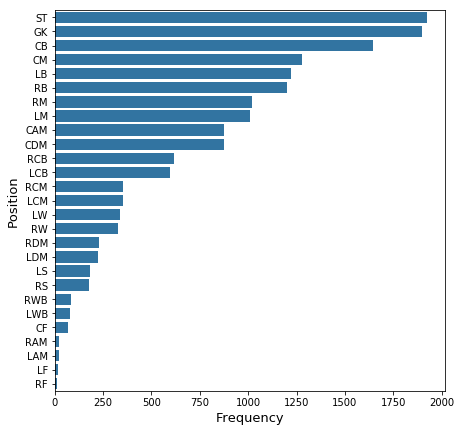

In [30]:
ax = plt.subplots(1,1, figsize=(7,7))

base_color = sb.color_palette()[0]
sb.countplot(data = soccer, y = 'Position', color = base_color, order = position_count.index)
plt.ylabel('Position', color = 'black', fontsize = '13')
plt.xlabel('Frequency', color = 'black', fontsize = '13');

- We have more players playing as a striker. Next we have more Goal keepers.

#### Lets see the most used foot by players.

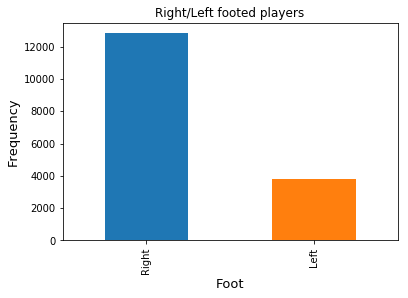

In [31]:
soccer['Preferred_foot'].value_counts().plot.bar(title="Right/Left footed players")
plt.ylabel('Frequency', color = 'black', fontsize = '13')
plt.xlabel('Foot', color = 'black', fontsize = '13');

- Most of the players are Right footed.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

#### For my continuous variables
> - I started with the Weight variable: This has a normal distribution with most players weighing between 154lbs and 165lbs
- Next i had a look at the Age variable: This was really interesting because it's distribution is slightly positively skewed. This made me to confirm my thought and i saw the mean is greater than median and median greater than the mode.
- The Height variable is Bimodal.

#### For my categorical variables
> - I started with the 'Nationality' : I viewed the countries that appeared most in the data. England tops the ranking.
- Next i had a look at the Club and wasn't surprised at all to see 6 clubs from England in the top10.
- Most palyers in the data play the position ST which is the top striker in the team.
- Most players are Right footed.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> When i had a look at the players Height distribution, it was looking so abnormal then i noticed it was poorly format e.g 67 = 6'7. I fixed that and also some missing values were in columns like clubs, Joined, Contract and i removed such rows because for safety that was best for our analysis. 

## Bivariate Exploration

#### Let's have a look at correlations

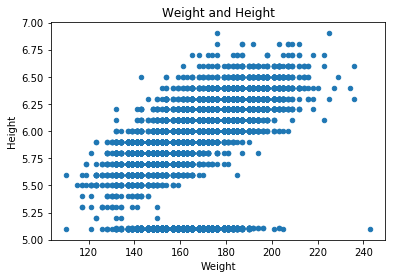

In [32]:
# Correlation between weight and height
soccer.plot(x='Weight', y='Height', kind='scatter', title = 'Weight and Height');

This shows a weak positive correlation

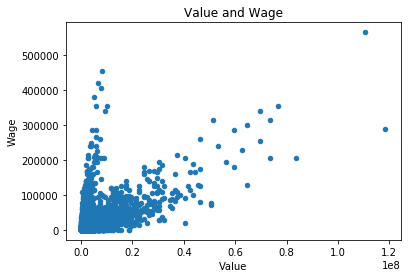

In [33]:
# Correlation between Value and Wage
soccer.plot(x='Value', y='Wage', kind='scatter', title = 'Value and Wage');

- This shows a fairly strong relationship

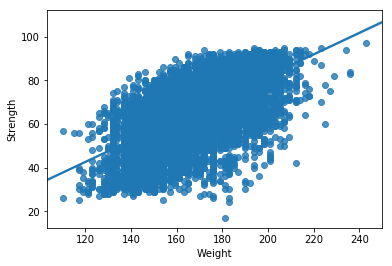

In [34]:
# Correlation between weight and strength
sb.regplot(data = soccer, x='Weight', y='Strength');
plt.xlabel('Weight')
plt.ylabel('Strength');

- There is a strong correlation between Weight and Strength.

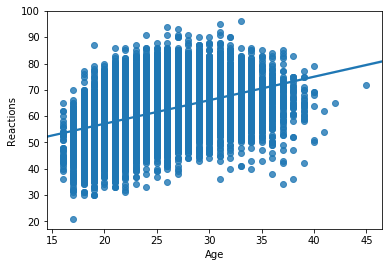

In [35]:
# Correlation between weight and strength
sb.regplot(data = soccer, x='Age', y='Reactions');
plt.xlabel('Age')
plt.ylabel('Reactions');

- This shows a weak positive relationship

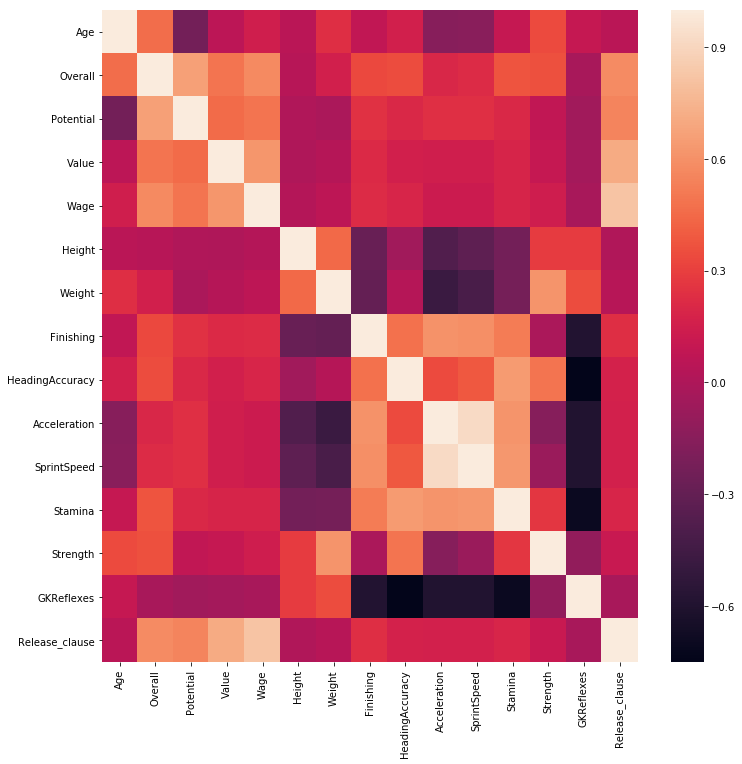

In [36]:
soccer_hist = soccer[['Age', 'Overall', 'Potential', 'Value', 'Wage', 'Height', 'Weight', 'Finishing', 'HeadingAccuracy', 
                     'Acceleration','SprintSpeed','Stamina','Strength','GKReflexes','Release_clause',]]

# plotting heatmap
f, ax = plt.subplots(figsize=(12, 12))
corr = soccer_hist.corr()
sb.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values);

#### Observations

- Acceleration has a negative correlation with Weight.
- As expected Age has a negative correlation with Potential.
- Wage has a positive correlation with Release clause.
- Potential has a positive correlation with Release clause.
- Value has a positive correlation with Wage.

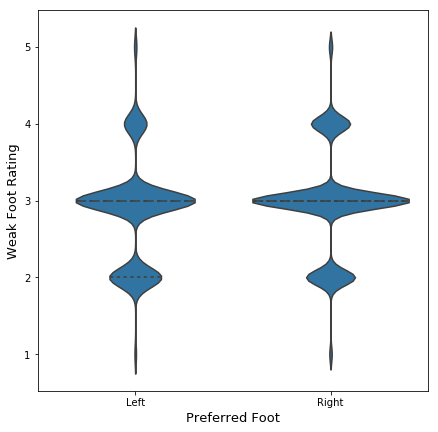

In [37]:
# plotting violin plot
ax = plt.subplots(1,1, figsize=(7,7))

base_color = sb.color_palette()[0]
sb.violinplot(data = soccer, x = 'Preferred_foot', y = 'Weak_foot', 
             color = base_color,
              inner = 'quartile')
plt.ylabel('Weak Foot Rating', color = 'black', fontsize = '13')
plt.xlabel('Preferred Foot', color = 'black', fontsize = '13');

- This shows us that most players, left footed or right foot had a rating of 3 for their week foot. Only few got a rating above 3.

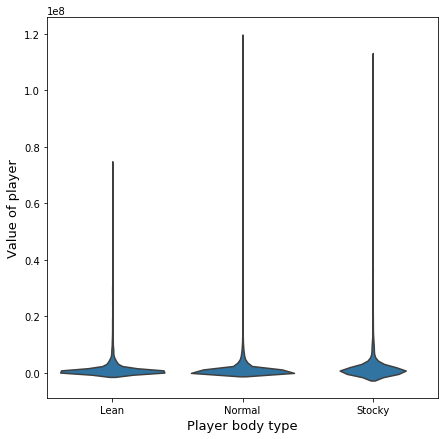

In [38]:
# plotting violin plot
ax = plt.subplots(1,1, figsize=(7,7))

base_color = sb.color_palette()[0]
sb.violinplot(data = soccer, x = 'Body_type', y = 'Value', 
             color = base_color,
              inner = None)
plt.ylabel('Value of player', color = 'black', fontsize = '13')
plt.xlabel('Player body type', color = 'black', fontsize = '13');

- This tells us that, players with normal body type are valued more. 

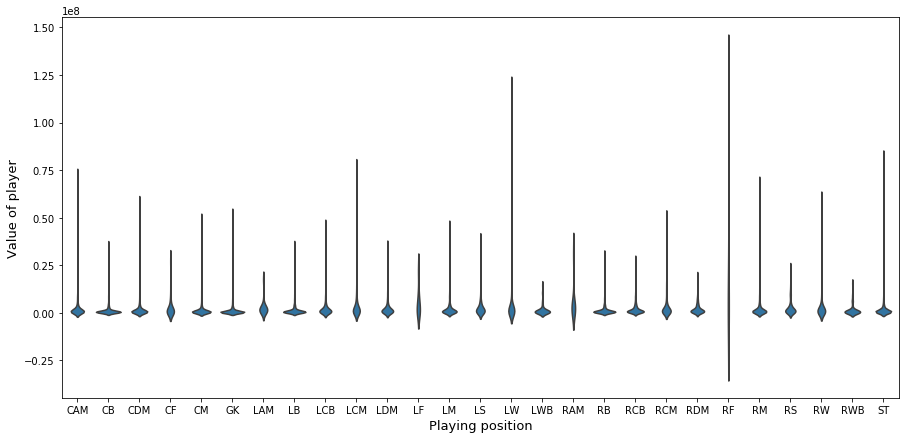

In [39]:
# plotting violin plot
ax = plt.subplots(1,1, figsize=(15,7))

base_color = sb.color_palette()[0]
sb.violinplot(data = soccer, x = 'Position', y = 'Value', 
             color = base_color,
              inner = None)
plt.ylabel('Value of player', color = 'black', fontsize = '13')
plt.xlabel('Playing position', color = 'black', fontsize = '13');

- Of all playing position, Right Forward players are valued more. Right wing back position and Left wing back position are valued lowest.

#### Let's see the distribution of players body type.

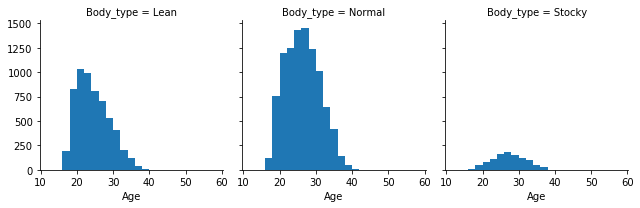

In [40]:
# plotting Facet
bins = np.arange(12, 58+2, 2)
g = sb.FacetGrid(data = soccer, col = 'Body_type')
g.map(plt.hist, 'Age', bins = bins);

- This tells us the distribution of Age and the body type a player has. Most of our players in the data have a normal body type, and very few players have a stocky body type.

#### Top 10 clubs that pay more wages

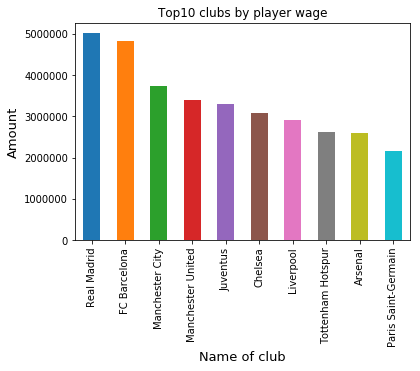

In [41]:
# Group by club then sum the wage.
wages10 = soccer.groupby('Club')['Wage'].sum().sort_values(ascending = False).head(10)

# plot
wages10.plot.bar(title="Top10 clubs by player wage")
plt.ylabel('Amount', color = 'black', fontsize = '13')
plt.xlabel('Name of club', color = 'black', fontsize = '13');

- Real Madrid has the most Wage. This means they have a high number of high profile players

#### Top 10 player who earn most

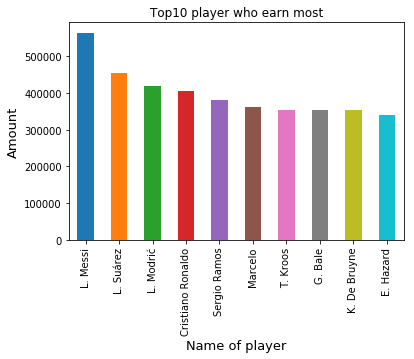

In [42]:
# Group by name then sum the wage.
p_wages10 = soccer.groupby('Name')['Wage'].sum().sort_values(ascending = False).head(10)

# plot
p_wages10.plot.bar(title="Top10 player who earn most")
plt.ylabel('Amount', color = 'black', fontsize = '13')
plt.xlabel('Name of player', color = 'black', fontsize = '13');

- Messi earns more than any other player.

#### Let's see if nationality has any role to play with the value of players

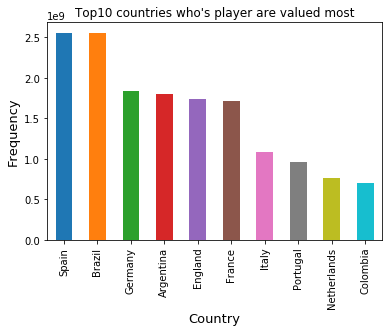

In [43]:
# Group by nationality then sum the value.
p_nation = soccer.groupby('Nationality')['Value'].sum().sort_values(ascending = False).head(10)

# plot
p_nation.plot.bar(title="Top10 countries who's player are valued most")
plt.ylabel('Frequency', color = 'black', fontsize = '13')
plt.xlabel('Country', color = 'black', fontsize = '13');

- This tells us Spanish and Brazilian players are valued most. 

#### Countries with the highest player ratings

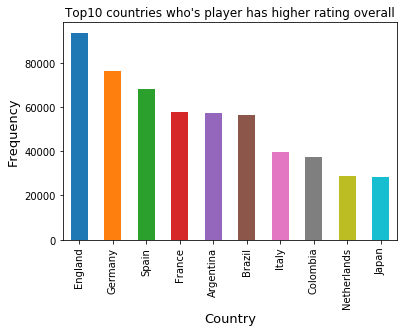

In [44]:
# Group by nationality then sum the value.
p_overall = soccer.groupby('Nationality')['Overall'].sum().sort_values(ascending = False).head(10)

# plot
p_overall.plot.bar(title="Top10 countries who's player has higher rating overall")
plt.ylabel('Frequency', color = 'black', fontsize = '13')
plt.xlabel('Country', color = 'black', fontsize = '13');

- Overall England players have the highest player ratings on FIFA19

> ### Relationships


-  I started by viewing the relationship between Weight and Height, there was a weak positive relationship between both features. Player value and wage has a fairly strong relationship, in most cases when a player is valued in a club, he also gets well paid too. Surprisingly Weight and Strength has a strong correlation. 
-  I had a look at some relationship between quantitative and qualitative features in the data. Right-footed and Left-footed players got rated '3' more, for their weaker foot. And also most players in the data have a normal body type. Only few players have a stocky body type.

- Wage has a positive correlation with Release clause. The higher a player's salary is, the higher clubs also set his release clause. Most football clubs see it as a way to tie a player to their club.

- This came as a 'No suprise', Acceleration has a negative correlation with Weight. The more a player weighs, his acceleration reduces. And also as expected Age has a negative correlation with Potential. Based on reasoning, when a player gets older he is no longer referred to as a potential. Young players are mostly seen as players with potentials.

- When i had a look at the club with the highest Wage. Real Madrid has the most Wage. This tells us they have a high number of high profile players, which is why they are referred to as All stars team. 
- Messi earns more than any other player. While i also tried to see if Nationality has any role to play with a player's valuation. I noticed Spanish and Brazilian players are valued most. English players have the highest player ratings on FIFA19.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- Surpisingly players who play Right-forward positions are valued more than other positions. Then the Right-wing back and Left-wing back are valued lowest.

## Multivariate Exploration


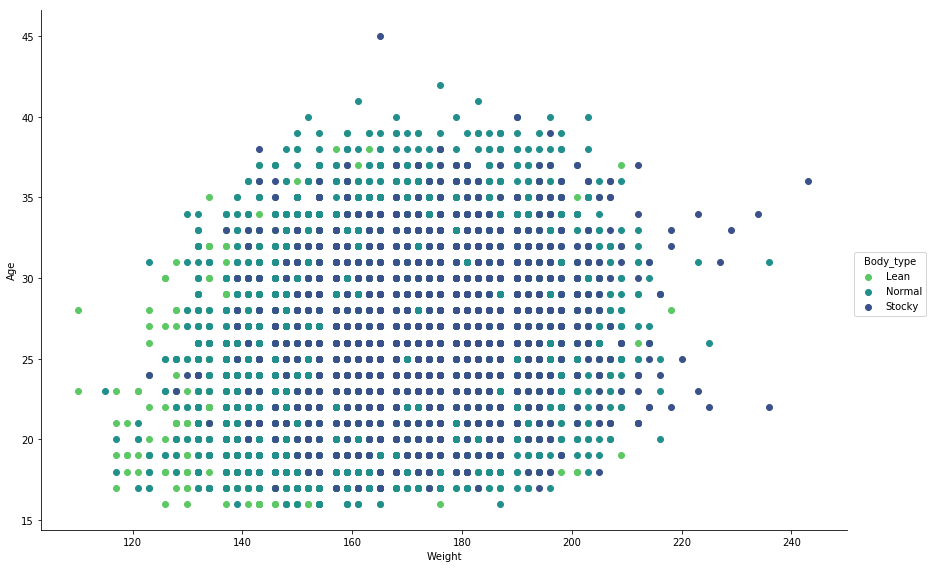

In [45]:
# plotting facet
g = sb.FacetGrid(data = soccer, hue = 'Body_type', size = 8, aspect = 1.5, palette = 'viridis_r')
g.map(plt.scatter, 'Weight', 'Age')
g.add_legend();

- This shows me something i didn't even think about. Most of the younger players weighs lesser and they also have more of a lean body type.

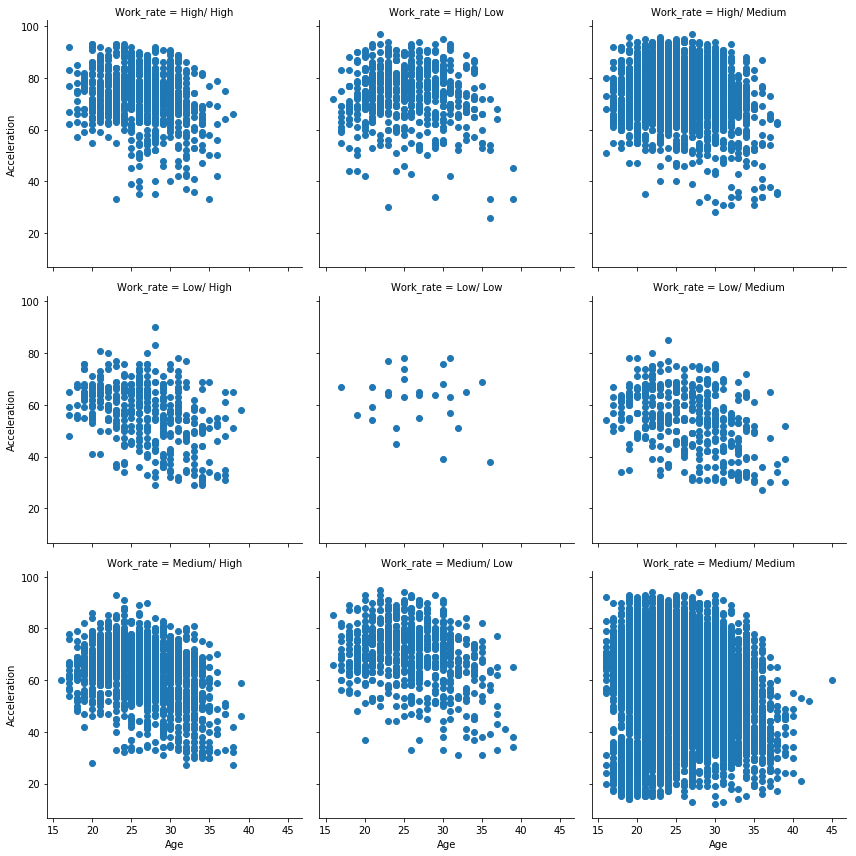

In [46]:
# plotting facet
g = sb.FacetGrid(data = soccer, col = 'Work_rate', col_wrap = 3, size = 4)
g.map(plt.scatter, 'Age', 'Acceleration');

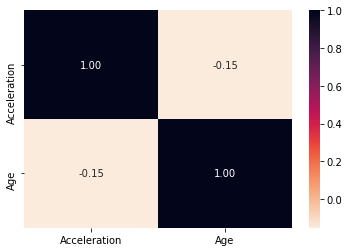

In [47]:
age_ace = ['Acceleration', 'Age']

# plotting heatmap 
sb.heatmap(soccer[age_ace].corr(), cmap = 'rocket_r', annot = True, fmt = '.2f');

- Players whose work rate is High/High, High/Medium have a high acceleration and the Low/Low have a lower acceleration.

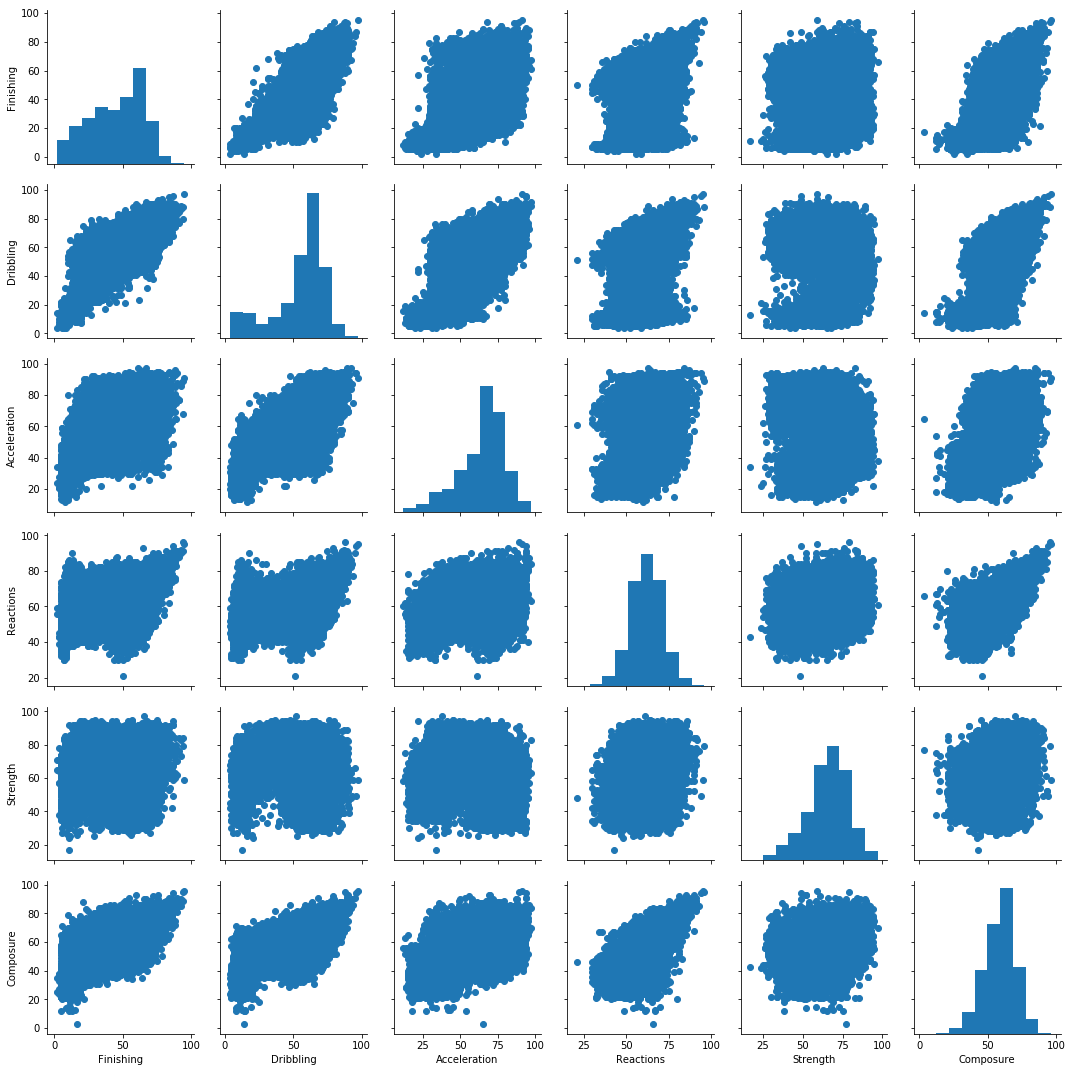

In [48]:
# plotting matrices 

player_stats = ['Finishing', 'Dribbling', 'Acceleration', 'Reactions', 'Strength', 'Composure']

g = sb.PairGrid(data = soccer, vars = player_stats);
g.map_offdiag(plt.scatter);
g.map_diag(plt.hist);

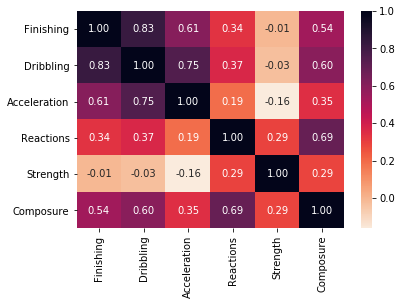

In [49]:
# plotting heatmap 
sb.heatmap(soccer[player_stats].corr(), cmap = 'rocket_r', annot = True, fmt = '.2f');

#### Observations

- There is a negative correlaton between Finishing and Strength.
- Surprisingly there is a really strong positive correlation between Finishing and Dribbling.
- Another surprising strong positively correlation between Acceleration and Dribbling.
- A negative relationship between Strength and Finishing, Strength, Dribblinng.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I decided to look further into how infuential the Age feature and acceleration could be regarding a player's work rate, it's so obvious now that as a player ages, so does his acceleration but in some cases a player's age does not influence his work rate. Players whose work rate is High/High, High/Medium have a high acceleration and the Low/Low have a lower acceleration.

### Were there any interesting or surprising interactions between features?

> I found some interesting relationships when i checked the pairwise relationships between players abilities. It's really surprising to know there is a really strong positive correlation between a player's Finishing and Dribbling ability.

In [50]:
jupyter nbconvert exploration_temp-Copy1.ipynb --to slides --post serve --template output_toggle

SyntaxError: invalid syntax (<ipython-input-50-7103062b388f>, line 1)